In [1]:
import numpy as np
from scipy.sparse.linalg import eigs
from scipy.integrate import odeint
from scipy.integrate import RK45
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import simpson

0.9999999767751433
2.99999940196285
4.999989531433674
6.999883196747395
8.999060748016927


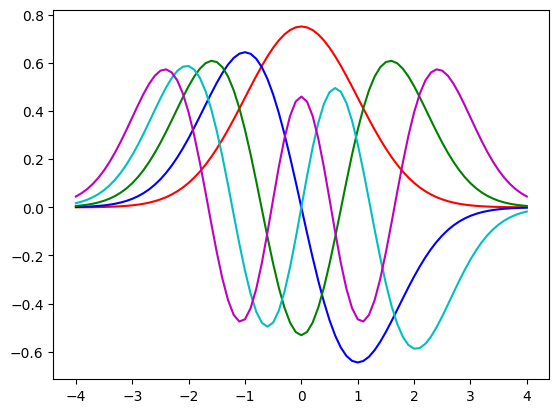

In [2]:
## Problem a
def shoot2(phi, x, eps):
    return [phi[1], (x ** 2 - eps) * phi[0]]

eigenfun = []; eigenval = []
tol = 1e-4
col = ['r', 'b', 'g', 'c', 'm', 'k']
xp = [-4, 4]
xshoot = np.linspace(xp[0], xp[1], 81)

eps_start = 0.1
for modes in range(1, 6):
    eps = eps_start + 0.1
    deps = 0.2

    for _ in range(1000):
        y0 = [1, np.sqrt(16 - eps)]
        y = odeint(shoot2, y0, xshoot, args=(eps,))
        alpha = 16 - eps
        if abs(y[-1,1] + np.sqrt(alpha) * y[-1,0]) < tol:
            print(eps)
            eigenval.append(eps)
            break

        if (-1) ** (modes + 1) * (y[-1,1] + np.sqrt(alpha) * y[-1,0]) > 0:
            eps += deps
        else:
            eps -= deps / 2
            deps /= 2

    eps_start = eps + 2
    norm = np.trapz(y[:, 0] ** 2, xshoot)
    norm_phi = y[:, 0] / np.sqrt(norm)
    eigenfun.append(abs(norm_phi))
    plt.plot(xshoot, norm_phi, col[modes - 1])

A1 = np.array(eigenfun).T
eigenvalue = np.array(eigenval)
A2 = eigenvalue

0.9997357911430299
2.999002601858229
4.998463054653259
6.997581001278014
8.99625424956903


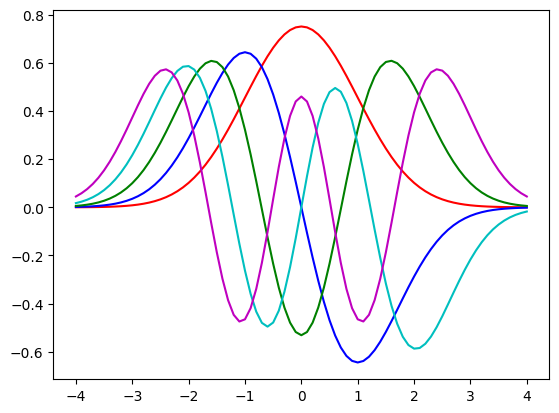

In [3]:
def shoot2(x, y, eps):
    return [y[1], (x ** 2 - eps) * y[0]]

eigenfun = []; eigenval = []
tol = 1e-4
col = ['r', 'b', 'g', 'c', 'm', 'k']
xp = [-4, 4]
xshoot = np.linspace(xp[0], xp[1], 81)

eps_start = 0.1
for modes in range(1, 6):
    eps = eps_start + 0.1
    deps = 0.2

    for _ in range(1000):
        y0 = [1, np.sqrt(16 - eps)]
        sol = solve_ivp(lambda x, y: shoot2(x, y, eps), [xp[0], xp[-1]], y0, t_eval=xshoot)
        y = sol.y.T
        alpha = 16 - eps
        if abs(y[-1,1] + np.sqrt(alpha) * y[-1,0]) < tol:
            print(eps)
            eigenval.append(eps)
            break

        if (-1) ** (modes + 1) * (y[-1,1] + np.sqrt(alpha) * y[-1,0]) > 0:
            eps += deps
        else:
            eps -= deps / 2
            deps /= 2

    eps_start = eps + 2
    norm = np.trapz(y[:, 0] ** 2, xshoot)
    norm_phi = y[:, 0] / np.sqrt(norm)
    eigenfun.append(abs(norm_phi))
    plt.plot(xshoot, norm_phi, col[modes - 1])

eigenvalue = np.array(eigenval)
A2_sol = eigenvalue

In [4]:
## Problem b
xp = [-4, 4]
N = 79
dx = 0.1
x = np.linspace(xp[0], xp[1], 81)

B = np.zeros((N, N))
for j in range(N):
  B[j, j] = -2 - (x[j + 1] ** 2) * (dx ** 2)
for j in range(N-1):
  B[j, j + 1] = 1
  B[j + 1, j] = 1

B1 = np.copy(B)

B2 = np.zeros((N, N))
B2[0, 0] = 4 / 3
B2[0, 1] = -1 / 3

B3 = np.zeros((N, N))
B3[N - 1, N - 1] = 4 / 3
B3[N - 1, N - 2] = -1 / 3

B = (B1 + B2 + B3) / (dx**2)
D,V = eigs(-B, k=5, which='SM')

phi_0 = (4/3)*V[0,:] - (1/3)*V[1,:]
phi_end = (4/3)*V[-1,:] - (1/3)*V[-2,:]
V = np.vstack((phi_0, V, phi_end))

for i in range(5):
  norm = np.trapz(V[:, i] ** 2, x)
  V[:,i] = abs(V[:, i] / np.sqrt(norm))

A3 = V
A4 = D
print(A4)

[0.99937352+0.j 2.996839  +0.j 4.99140656+0.j 6.98038865+0.j
 8.95060003+0.j]


In [5]:
## Problem e
def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

h = np.array([np.ones_like(x), 2*x, 4*x**2-2, 8*x**3-12*x, 16*x**4-48*x**2+12])
phi = np.zeros((len(x),5))

for j in range(5):
  phi[:,j] = (np.exp(-x**2 / 2)*(h[j,:]) / (np.sqrt(factorial(j)*2**j*np.sqrt(np.pi)))).T

eps_a = np.zeros(5)
eps_b = np.zeros(5)
er_a = np.zeros(5)
er_b = np.zeros(5)

array = [1,3,5,7,9]
ysola = A1
ysolb = A3
esola = A2_sol
esolb = A4

for j in range(5):
  eps_a[j] = np.trapz((abs(ysola[:,j]) - abs(phi[:,j]))**2, x)
  eps_b[j] = np.trapz((abs(ysolb[:,j]) - abs(phi[:,j]))**2, x)
  er_a[j] = 100 * abs(esola[j]-(2*(j+1)-1)) / (2*(j+1)-1)
  er_b[j] = 100 * abs(esolb[j]-(2*(j+1)-1)) / (2*(j+1)-1)

A10 = (eps_a.reshape(5,1)).flatten()
A11 = (er_a.reshape(5,1)).flatten()
A12 = eps_b.reshape(5,1).flatten()
A13 = er_b.reshape(5,1).flatten()
print(A10)
print(A11)
print(A12)
print(A13)

[5.18234743e-12 2.73912178e-10 7.49043496e-09 1.45876981e-07
 2.31510336e-06]
[0.02642089 0.0332466  0.03073891 0.03455712 0.04161945]
[2.33908579e-07 2.39720320e-06 1.81275996e-05 1.53048072e-04
 1.24238600e-03]
[0.0626477  0.10536673 0.1718688  0.28016214 0.54888859]


In [6]:
## Problem c
def hw3_rhs_c(x, y, eps, gamma):
    return [y[1], (gamma * (y[0] ** 2) + x**2 -eps) * y[0]]

L = 2; x = np.arange(-L, L+0.1, 0.1); N = len(x); tol = 1e-4
A5, A7 = np.zeros((N,2)), np.zeros((N,2))
A6, A8 = np. zeros(2), np.zeros(2)

for gamma in [0.05, -0.05]:
  eps_start, A = 0.1, 1e-6

  for mode in range(1,3):
    dA = 0.01

    for j in range(1000):
      eps, deps = eps_start, 0.2

      for jj in range(1000):
        y0 = [A, np.sqrt(L**2 - eps)*A]
        sol = solve_ivp(lambda x, y: hw3_rhs_c(x, y, eps, gamma), [x[0], x[-1]], y0, t_eval=x)
        ys = sol.y.T
        xs = sol.t
        bc = ys[-1,1] + np.sqrt(L**2-eps) * ys[-1,0]
        if abs(bc) < tol:
          break
        if (-1)**(mode+1)*bc > 0:
          eps += deps
        else:
          eps -= deps
          deps /= 2

      area = np.trapz(ys[:,0]**2, xs)
      if abs(area-1) < tol:
        break
      if area < 1:
        A += dA
      else:
        A -= dA
        dA /= 2

    eps_start = eps + 0.2

    if gamma == 0.05:
      A5[:, mode-1] = abs(ys[:,0])
      A6[mode-1] = eps

    else:
      A7[:, mode-1] = abs(ys[:,0])
      A8[mode-1] = eps

print(A5)
print(A6)

[[1.10635766e-01 3.42979516e-01]
 [1.31429470e-01 3.80290457e-01]
 [1.55625523e-01 4.20298338e-01]
 [1.83290905e-01 4.61667507e-01]
 [2.14401682e-01 5.02862063e-01]
 [2.48823179e-01 5.42238220e-01]
 [2.86309974e-01 5.78044314e-01]
 [3.26505902e-01 6.08420795e-01]
 [3.69036730e-01 6.31522342e-01]
 [4.13260479e-01 6.45529961e-01]
 [4.58263690e-01 6.48549700e-01]
 [5.03127115e-01 6.39141082e-01]
 [5.46926595e-01 6.16335269e-01]
 [5.88733062e-01 5.79635054e-01]
 [6.27612539e-01 5.29014869e-01]
 [6.62626141e-01 4.64973232e-01]
 [6.92830070e-01 3.88665882e-01]
 [7.17275622e-01 3.01711236e-01]
 [7.35111491e-01 2.06173753e-01]
 [7.45946372e-01 1.04565328e-01]
 [7.49550190e-01 1.54698416e-04]
 [7.45860849e-01 1.04703472e-01]
 [7.34990607e-01 2.06208000e-01]
 [7.17226065e-01 3.01753292e-01]
 [6.93028179e-01 3.88786189e-01]
 [6.63032249e-01 4.65194384e-01]
 [6.28047927e-01 5.29306421e-01]
 [5.89058106e-01 5.79914898e-01]
 [5.47125643e-01 6.16553945e-01]
 [5.03261321e-01 6.39328982e-01]
 [4.584265

In [7]:
## Problem d
def bvp_rhs(x, y, eps):
  return [y[1], (x ** 2 - eps) * y[0]]

L = 2; xspan = [-L, L]; eps = 1; A = 1
y0 = [A, np.sqrt(L**2 - eps)*A]
tols = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

od45, od23, odadau, odbdf = [], [], [], []

for tol in tols:
  options = {'rtol': tol, 'atol': tol}
  sol45 = solve_ivp(bvp_rhs, xspan, y0, method='RK45', args=(eps,), **options)
  sol23 = solve_ivp(bvp_rhs, xspan, y0, method='RK23', args=(eps,), **options)
  soladau = solve_ivp(bvp_rhs, xspan, y0, method='Radau', args=(eps,), **options)
  solbdf = solve_ivp(bvp_rhs, xspan, y0, method='BDF', args=(eps,), **options)

  od45.append(np.mean(np.diff(sol45.t)))
  od23.append(np.mean(np.diff(sol23.t)))
  odadau.append(np.mean(np.diff(soladau.t)))
  odbdf.append(np.mean(np.diff(solbdf.t)))

fit45 = np.polyfit(np.log(od45), np.log(tols), 1)
fit23 = np.polyfit(np.log(od23), np.log(tols), 1)
fit113 = np.polyfit(np.log(odadau), np.log(tols), 1)
fit15 = np.polyfit(np.log(odbdf), np.log(tols), 1)

A9 = (np.array([fit45[0], fit23[0], fit113[0], fit15[0]])).flatten(order='C')
A9

array([5.24466756, 3.01909953, 4.03819927, 6.45751261])